In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [14]:
path = r"D:\python projects\ML_HandsOn_PDF\handson-ml2\datasets\housing\housing.csv"
housing_dataset = pd.read_csv(path)
housing_dataset.head()
# housing_dataset.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
scalar = MinMaxScaler()
scalar.fit(housing_dataset[['housing_median_age']] )
housing_dataset['housing_median_age'] = scalar.transform(housing_dataset[['housing_median_age']] )

scalar.fit(housing_dataset[['median_income']] )
housing_dataset['median_income'] = scalar.transform(housing_dataset[['median_income']] )

In [27]:
print(type(housing_dataset[['median_income']].iloc[:5]) )
print(type(scalar.transform(housing_dataset[['median_income']].iloc[:5] )))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


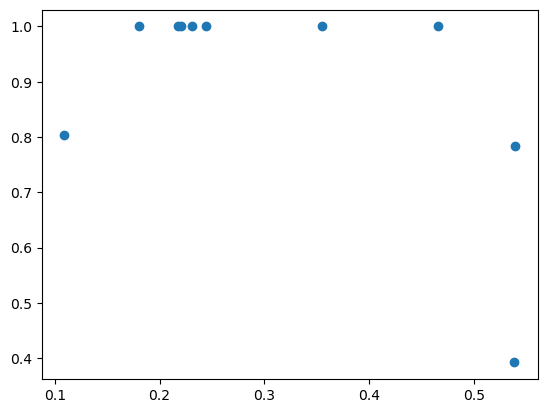

In [19]:
y_data = housing_dataset['housing_median_age'].iloc[0:10]
x_data = housing_dataset['median_income'].iloc[0:10]

plt.scatter(x_data, y_data)
# plt.plot()

In [20]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(housing_dataset[['housing_median_age', 'median_income']])
y_predict

c:\Users\rajar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 2, ..., 1, 1, 1])

[[0.59114348 0.2295242 ]
 [0.2741772  0.25324962]
 [0.88242648 0.20433997]]


[]

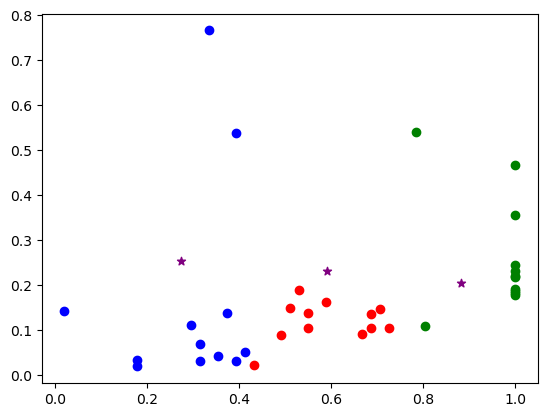

In [21]:
housing_dataset['cluster'] = y_predict
df1 = housing_dataset[housing_dataset['cluster']==0].iloc[:12]
df2 = housing_dataset[housing_dataset['cluster']==1].iloc[:12]
df3 = housing_dataset[housing_dataset['cluster']==2].iloc[:12]
print(km.cluster_centers_)
plt.scatter( df1['housing_median_age'], df1['median_income'],color = 'red')
plt.scatter( df2['housing_median_age'],df2['median_income'], color = 'blue')
plt.scatter( df3['housing_median_age'],df3['median_income'], color = 'green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', label = 'centroid')

plt.plot()

In [7]:
print(type(housing_dataset['housing_median_age']))
print(housing_dataset['housing_median_age'])

<class 'pandas.core.series.Series'>
0        0.784314
1        0.392157
2        1.000000
3        1.000000
4        1.000000
           ...   
20635    0.470588
20636    0.333333
20637    0.313725
20638    0.333333
20639    0.294118
Name: housing_median_age, Length: 20640, dtype: float64


In [8]:
print(type(housing_dataset[['housing_median_age']]))
print(housing_dataset[['housing_median_age']])

<class 'pandas.core.frame.DataFrame'>
       housing_median_age
0                0.784314
1                0.392157
2                1.000000
3                1.000000
4                1.000000
...                   ...
20635            0.470588
20636            0.333333
20637            0.313725
20638            0.333333
20639            0.294118

[20640 rows x 1 columns]
